In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

c:\users\hasan\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
)

train_generator = train_datagen.flow_from_directory(
    "potato/dataset/train",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse",
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
)

val_generator = train_datagen.flow_from_directory(
    "potato/dataset/val",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse",
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
)

test_generator = train_datagen.flow_from_directory(
    "potato/dataset/test",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse",
)

Found 14440 images belonging to 15 classes.
Found 2058 images belonging to 15 classes.
Found 4140 images belonging to 15 classes.


10.0


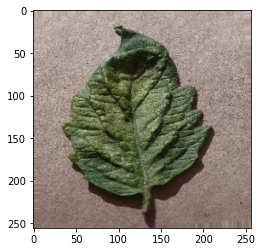

In [3]:
for image_batch, label_batch in train_generator:
    plt.imshow(image_batch[31])
    print(label_batch[31])
    break

In [4]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 15

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])



In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [6]:


model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)



In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=4,
    batch_size=32,
    validation_data=val_generator,
    validation_steps=4,
    verbose=1,
    epochs=10,
)

Epoch 1/10
4/4 [==============================] - 24s 6s/step - loss: 2.7068 - accuracy: 0.0156 - val_loss: 2.6708 - val_accuracy: 0.1016
Epoch 2/10
4/4 [==============================] - 18s 5s/step - loss: 2.6814 - accuracy: 0.1016 - val_loss: 2.6194 - val_accuracy: 0.1562
Epoch 3/10
4/4 [==============================] - 18s 5s/step - loss: 2.6732 - accuracy: 0.1484 - val_loss: 2.6187 - val_accuracy: 0.2109
Epoch 4/10
4/4 [==============================] - 18s 5s/step - loss: 2.5777 - accuracy: 0.2188 - val_loss: 2.5265 - val_accuracy: 0.1875
Epoch 5/10
4/4 [==============================] - 19s 5s/step - loss: 2.6603 - accuracy: 0.1719 - val_loss: 2.5835 - val_accuracy: 0.2656
Epoch 6/10
4/4 [==============================] - 17s 4s/step - loss: 2.6052 - accuracy: 0.1094 - val_loss: 2.5649 - val_accuracy: 0.1250
Epoch 7/10
4/4 [==============================] - 17s 4s/step - loss: 2.5182 - accuracy: 0.1719 - val_loss: 2.6393 - val_accuracy: 0.1484
Epoch 8/10
4/4 [==================

In [ ]:
model.evaluate(test_generator)

127/130 [============================>.] - ETA: 3s - loss: 2.5141 - accuracy: 0.1562